# Upload to db

This notebook takes a local gdf and uploads it to OdC database.

### Import libraries

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from pandas.api.types import CategoricalDtype

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/jovyan/accesibilidad-urbana/aup/data.py:25: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(


### Config notebook

In [7]:
# Input
gdf_dir = f'../../data/external/temporal_todocker/espaciopublico_zmm_4326.gpkg'
destination_crs = 'EPSG:4326'

# Output
schema = 'espacios_publicos'
table = 'ep_mty'
if_exists = 'replace'

### Review data

(8047, 10)
  Name  Shape_Leng   Shape_Area Fuente  Municipio       Distrito  \
0   19  384.951114  7508.979829  INEGI  Guadalupe  Norte Oriente   
1   19  496.080476  7356.672272  INEGI  Guadalupe            Sur   

             Rango Cercanía Tipología  \
0  5001 - 10000 m2       Si      None   
1  5001 - 10000 m2       Si      None   

                                            geometry  
0  MULTIPOLYGON Z (((-100.21156 25.69807 0.00000,...  
1  MULTIPOLYGON Z (((-100.26862 25.65838 0.00000,...  


<Axes: >

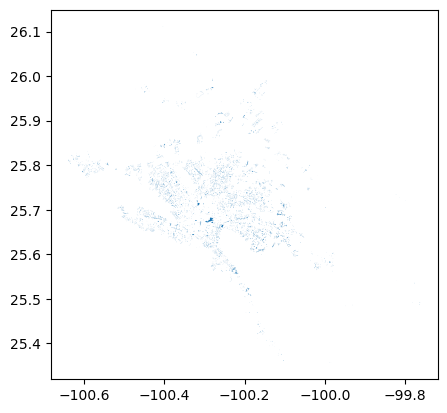

In [8]:
gdf = gpd.read_file(gdf_dir)
gdf = gdf.to_crs(destination_crs)

# Show
print(gdf.shape)
print(gdf.head(2))
gdf.plot()

### Upload to db

In [9]:
aup.gdf_to_db_slow(gdf, table, schema, if_exists=if_exists)